# Week 2 - Preprocessing, part 2

# 1. Lesson: None

# 2. Weekly graph question

The Storytelling With Data book mentions planning on a "Who, What, and How" for your data story.  Write down a possible Who, What, and How for your data, using the ideas in the book.

In terms of storytelling with the dataset of Flight delays, I believe my audience would be CEOs of airlines, comittee board members of large airline companines.  Now for the 'what', what is it that I need to convey to the airlines about the flight delays. Why do they need to know something and what is that something.  Which airport has the most delays/cancellations? Is this weather dependant so its out of anyones hands.  Are there money saving actions that can take place to avoid delays. CEOs and board members mostly want to talk money. Are they still making the same amount of money without or without delays? Or are delays costing more in employee fare and possible customer pay outs, more jet fuel if the plane has to circle before landing? 

How will I convey my what? I will need to run an efficient EDA and research airlines and cost analysis on flight delays. 

# 3. Homework - work with your own data

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

In [2]:
Flight_delay = pd.read_csv("Flight_delay.csv")
Flight_delay

,DayOfWeek,Date,DepTime,ArrTime,CRSArrTime,UniqueCarrier,Airline,FlightNum,TailNum,ActualElapsedTime,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,4,03-01-2019,1829,1959,1925,WN,Southwest Airlines Co.,3920,N464WN,90,...,3,10,0,N,0,2,0,0,0,32
1,4,03-01-2019,1937,2037,1940,WN,Southwest Airlines Co.,509,N763SW,240,...,3,7,0,N,0,10,0,0,0,47
2,4,03-01-2019,1644,1845,1725,WN,Southwest Airlines Co.,1333,N334SW,121,...,6,8,0,N,0,8,0,0,0,72
3,4,03-01-2019,1452,1640,1625,WN,Southwest Airlines Co.,675,N286WN,228,...,7,8,0,N,0,3,0,0,0,12
4,4,03-01-2019,1323,1526,1510,WN,Southwest Airlines Co.,4,N674AA,123,...,4,9,0,N,0,0,0,0,0,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
484546,5,13-06-2019,1609,1942,1915,AA,American Airlines Inc.,1496,N510AA,153,...,7,15,0,N,0,27,0,0,0,0
484547,6,14-06-2019,1616,1954,1915,AA,American Airlines Inc.,1496,N559AA,158,...,11,11,0,N,0,11,0,0,0,28
484548,2,17-06-2019,1617,2002,1915,AA,American Airlines Inc.,1496,N505AA,165,...,7,17,0,N,0,0,22,5,0,20
484549,7,22-06-2019,1607,1941,1915,AA,American Airlines Inc.,1496,N421AA,154,...,5,12,0,N,0,1,0,0,0,25


In [3]:
Flight_delay.describe()

,DayOfWeek,DepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,484551.000000,484551.000000,484551.000000,484551.000000,484551.000000,484551.000000,484551.000000,484551.000000,484551.000000,484551.000000,484551.000000,484551.000000,484551.000000,484551.0,484551.0,484551.000000,484551.000000,484551.000000,484551.000000,484551.000000
mean,3.991605,1564.477865,1617.784438,1652.129929,2139.207386,134.810422,131.400761,108.877134,60.907764,57.498086,752.142689,6.782413,19.150876,0.0,0.0,17.419440,3.153284,13.599421,0.082033,26.653587
std,1.971466,452.235219,583.637660,466.096216,1812.677071,74.070374,71.542531,70.113513,56.975420,55.991012,571.631124,5.555816,15.309747,0.0,0.0,39.417893,19.503657,31.454655,1.884774,40.535994
min,1.000000,1.000000,1.000000,1.000000,1.000000,15.000000,-21.000000,0.000000,15.000000,6.000000,31.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1234.000000,1327.000000,1339.000000,629.000000,80.000000,79.000000,57.000000,25.000000,23.000000,331.000000,4.000000,11.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,1620.000000,1737.000000,1723.000000,1514.000000,116.000000,114.000000,90.000000,42.000000,40.000000,599.000000,5.000000,15.000000,0.0,0.0,2.000000,0.000000,1.000000,0.000000,13.000000
75%,6.000000,1928.000000,2049.000000,2025.000000,3683.000000,168.000000,162.000000,139.000000,76.000000,72.000000,992.000000,8.000000,22.000000,0.0,0.0,19.000000,0.000000,13.000000,0.000000,36.000000
max,7.000000,2400.000000,2400.000000,2359.000000,8403.000000,727.000000,602.000000,609.000000,1707.000000,1710.000000,4502.000000,207.000000,383.000000,0.0,0.0,1707.000000,1148.000000,1357.000000,392.000000,1254.000000


To check for all flight delays with actual weather problems I need to drop all rows that have a '0' meaning the delay wasn't related to weather.  I then describe the df for mean and std values.  

In [4]:
weather_probs = Flight_delay[Flight_delay["WeatherDelay"] != 0]
weather_probs.describe()


,DayOfWeek,DepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,34308.000000,34308.000000,34308.000000,34308.000000,34308.000000,34308.000000,34308.000000,34308.000000,34308.000000,34308.000000,34308.000000,34308.000000,34308.000000,34308.0,34308.0,34308.000000,34308.000000,34308.000000,34308.000000,34308.000000
mean,3.951761,1550.747697,1560.611665,1629.624636,2517.131048,138.236359,127.100618,104.819109,85.919990,74.784249,705.288621,7.142037,26.275213,0.0,0.0,2.406990,44.535589,13.935175,0.002186,25.040049
std,1.968350,485.237987,630.439076,469.427758,1720.813709,73.146679,67.681542,65.942065,73.065313,69.717024,523.140942,6.238156,25.092810,0.0,0.0,15.146255,59.410465,24.736748,0.240167,45.300220
min,1.000000,1.000000,1.000000,1.000000,1.000000,19.000000,15.000000,0.000000,15.000000,6.000000,31.000000,0.000000,0.000000,0.0,0.0,0.000000,1.000000,0.000000,0.000000,0.000000
25%,2.000000,1207.000000,1231.750000,1300.000000,953.000000,85.000000,76.000000,57.000000,36.000000,29.000000,307.000000,4.000000,12.000000,0.0,0.0,0.000000,10.000000,0.000000,0.000000,0.000000
50%,4.000000,1623.000000,1716.000000,1708.500000,2165.000000,121.000000,110.000000,88.000000,64.000000,54.000000,589.000000,5.000000,18.000000,0.0,0.0,0.000000,23.000000,4.000000,0.000000,0.000000
75%,6.000000,1935.000000,2043.000000,2020.000000,4172.000000,170.000000,155.000000,133.000000,113.000000,98.000000,925.000000,8.000000,30.000000,0.0,0.0,0.000000,55.000000,18.000000,0.000000,32.000000
max,7.000000,2400.000000,2400.000000,2359.000000,7711.000000,727.000000,601.000000,594.000000,1292.000000,1216.000000,4502.000000,157.000000,379.000000,0.0,0.0,1065.000000,1148.000000,342.000000,40.000000,761.000000


In [5]:
#percentage of flights that weather affected the time/ caused a delay
per_weather = len(weather_probs)/len(Flight_delay) * 100
per_weather

7.080369249057375

In [6]:
#Lets check how many flights were delayed due to carrier issues. Maintenance, crew problems, aircraft cleaning, fueling, etc
carrier_issue = Flight_delay[Flight_delay['CarrierDelay'] != 0]
carrier_issue

,DayOfWeek,Date,DepTime,ArrTime,CRSArrTime,UniqueCarrier,Airline,FlightNum,TailNum,ActualElapsedTime,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,4,03-01-2019,1829,1959,1925,WN,Southwest Airlines Co.,3920,N464WN,90,...,3,10,0,N,0,2,0,0,0,32
1,4,03-01-2019,1937,2037,1940,WN,Southwest Airlines Co.,509,N763SW,240,...,3,7,0,N,0,10,0,0,0,47
2,4,03-01-2019,1644,1845,1725,WN,Southwest Airlines Co.,1333,N334SW,121,...,6,8,0,N,0,8,0,0,0,72
3,4,03-01-2019,1452,1640,1625,WN,Southwest Airlines Co.,675,N286WN,228,...,7,8,0,N,0,3,0,0,0,12
5,4,03-01-2019,1416,1512,1435,WN,Southwest Airlines Co.,54,N643SW,56,...,2,5,0,N,0,12,0,0,0,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
484545,4,12-06-2019,1545,1944,1915,AA,American Airlines Inc.,1496,N498AA,179,...,7,24,0,N,0,10,0,19,0,0
484546,5,13-06-2019,1609,1942,1915,AA,American Airlines Inc.,1496,N510AA,153,...,7,15,0,N,0,27,0,0,0,0
484547,6,14-06-2019,1616,1954,1915,AA,American Airlines Inc.,1496,N559AA,158,...,11,11,0,N,0,11,0,0,0,28
484549,7,22-06-2019,1607,1941,1915,AA,American Airlines Inc.,1496,N421AA,154,...,5,12,0,N,0,1,0,0,0,25


In [7]:
carrier_issue.describe()

,DayOfWeek,DepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,258505.000000,258505.000000,258505.000000,258505.000000,258505.000000,258505.000000,258505.000000,258505.000000,258505.000000,258505.000000,258505.000000,258505.000000,258505.000000,258505.0,258505.0,258505.000000,258505.000000,258505.000000,258505.000000,258505.000000
mean,4.082084,1531.434409,1585.160264,1621.362430,2020.027110,137.484145,135.870575,113.422178,56.194422,54.580840,794.098288,6.379080,17.682888,0.0,0.0,32.651620,0.418843,6.086668,0.003149,17.034142
std,1.961663,468.005895,586.131880,485.824125,1708.571532,76.755363,74.650489,73.518757,56.494840,56.919622,594.979740,4.942072,12.239055,0.0,0.0,49.143569,6.109940,13.057407,0.390134,33.239725
min,1.000000,1.000000,1.000000,1.000000,1.000000,15.000000,15.000000,3.000000,15.000000,6.000000,31.000000,0.000000,0.000000,0.0,0.0,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1201.000000,1254.000000,1303.000000,610.000000,80.000000,80.000000,58.000000,24.000000,22.000000,337.000000,4.000000,10.000000,0.0,0.0,8.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,1556.000000,1709.000000,1700.000000,1469.000000,118.000000,117.000000,94.000000,38.000000,38.000000,629.000000,5.000000,15.000000,0.0,0.0,18.000000,0.000000,0.000000,0.000000,0.000000
75%,6.000000,1919.000000,2034.000000,2020.000000,3447.000000,172.000000,170.000000,145.000000,67.000000,67.000000,1045.000000,7.000000,21.000000,0.0,0.0,38.000000,0.000000,8.000000,0.000000,21.000000
max,7.000000,2400.000000,2400.000000,2359.000000,8403.000000,648.000000,602.000000,609.000000,1707.000000,1710.000000,4502.000000,207.000000,383.000000,0.0,0.0,1707.000000,529.000000,1289.000000,135.000000,1254.000000


In [8]:
#percentage of delays due to carrier issues
per_carrier = len(carrier_issue)/len(Flight_delay)* 100

53% of delays are due to carrier issues while 7% are weather issues. What about the other 40% of the time? 


In [9]:
delay_issues = Flight_delay[['AirTime', 'ArrDelay', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']]
delay_issues

,AirTime,ArrDelay,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,77,34,2,0,0,0,32
1,230,57,10,0,0,0,47
2,107,80,8,0,0,0,72
3,213,15,3,0,0,0,12
4,110,16,0,0,0,0,16
...,...,...,...,...,...,...,...
484546,131,27,27,0,0,0,0
484547,136,39,11,0,0,0,28
484548,141,47,0,22,5,0,20
484549,137,26,1,0,0,0,25


In [10]:
NAS_delay = delay_issues[delay_issues['NASDelay'] != 0]
NAS_delay.describe()

,AirTime,ArrDelay,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,250467.000000,250467.000000,250467.000000,250467.000000,250467.000000,250467.000000,250467.000000
mean,118.137835,65.085852,13.195734,3.404161,26.309306,0.062651,22.113999
std,73.762726,58.926765,34.330780,20.252727,39.745296,1.362538,37.021694
min,0.000000,15.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,63.000000,27.000000,0.000000,0.000000,5.000000,0.000000,0.000000
50%,100.000000,46.000000,0.000000,0.000000,12.000000,0.000000,8.000000
75%,151.000000,82.000000,13.000000,0.000000,29.000000,0.000000,28.000000
max,609.000000,1525.000000,1172.000000,1148.000000,1357.000000,135.000000,925.000000


In [11]:
per_NAS = len(NAS_delay)/len(Flight_delay)* 100
per_NAS

51.690534123343056

In [12]:
security_delay = delay_issues[delay_issues['SecurityDelay'] != 0]
late_air = delay_issues[delay_issues['LateAircraftDelay'] != 0]


In [13]:
per_security = len(security_delay)/len(Flight_delay) * 100
per_security

0.4523775619078281

In [14]:
per_late_air = len(late_air)/len(Flight_delay) * 100
per_late_air

62.55275502475488

In [15]:
per_list = {"Reasons": ['carrier', 'weather', 'NAS', 'security', 'late_air'], "Percent": [53.35, 7.08, 51.69, 0.45, 62.55]}
per_list

{'Reasons': ['carrier', 'weather', 'NAS', 'security', 'late_air'],
 'Percent': [53.35, 7.08, 51.69, 0.45, 62.55]}

Looks like late air craft is the largest reason for delays. This is followed by carrier delays and national aviation system.  I would have assumed that weather would have been a huge factor in the delay of aircraft but this does mean that delays could potentially be fixed because its not an act of nature.

I'm not sure if late aircraft can be combined with carrier and NAS? They seem to go hand in hand and one could affect the other. I tried looking into the kaggle dataset description but I couldnt find much if these columns have any relation. 

I think its best that we take a sample of this data to work with and graph considering the amount of rows the exsist.  Choosing the amount of rows is tricky. I could simply go with 100 but that seems to small for a dataset with almost 500,000 rows. Maybe 1000 with be a good number and still be graphed. Should I use sample correction for this? on the whole set of the sample I created? Shouldnt the numbers be similar?

In [16]:
sample_delay = Flight_delay.sample(n=1000, random_state = 42)
sample_delay

,DayOfWeek,Date,DepTime,ArrTime,CRSArrTime,UniqueCarrier,Airline,FlightNum,TailNum,ActualElapsedTime,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
9098,5,18-01-2019,2149,2304,2235,WN,Southwest Airlines Co.,3332,N345SA,75,...,6,9,0,N,0,3,0,0,0,26
52651,1,21-01-2019,835,957,905,EV,Atlantic Southeast Airlines,4450,N851AS,82,...,5,13,0,N,0,52,0,0,0,0
185971,5,14-03-2019,2136,2314,2230,WN,Southwest Airlines Co.,1071,N506SW,98,...,3,41,0,N,0,0,0,13,0,31
37599,4,10-01-2019,1932,2109,2010,UA,United Air Lines Inc.,1219,N818UA,157,...,9,17,0,N,0,0,0,59,0,0
238854,1,17-03-2019,1447,1632,1615,MQ,American Eagle Airlines Inc.,3861,N823AE,105,...,8,12,0,N,0,17,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203023,4,13-03-2019,1755,2020,2000,OO,Skywest Airlines Inc.,2515,N479CA,85,...,5,14,0,N,0,20,0,0,0,0
299622,6,26-04-2019,7,127,2351,US,US Airways Inc.,1132,N417US,80,...,5,19,0,N,0,96,0,0,0,0
237125,1,03-03-2019,1916,2029,1955,MQ,American Eagle Airlines Inc.,3544,N507AE,73,...,7,7,0,N,0,0,0,8,0,26
14121,7,27-01-2019,1755,1918,1600,WN,Southwest Airlines Co.,878,N310SW,83,...,8,16,0,N,0,0,119,13,0,66


In [17]:
sample_delay.describe()

,DayOfWeek,DepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.0,1000.0,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,3.920000,1551.735000,1580.224000,1632.205000,2145.922000,136.209000,134.02800,111.166000,58.259000,56.078000,775.749000,6.648000,18.395000,0.0,0.0,18.089000,2.852000,11.684000,0.034000,25.600000
std,1.949718,454.648499,604.700013,493.950635,1790.923766,76.857937,74.62552,73.254274,48.645126,48.585847,599.458888,4.821757,15.339631,0.0,0.0,32.350265,19.999402,25.445542,0.659757,37.631132
min,1.000000,7.000000,1.000000,1.000000,4.000000,34.000000,37.00000,16.000000,15.000000,6.000000,67.000000,1.000000,4.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1236.750000,1289.500000,1329.000000,636.500000,81.000000,80.00000,58.000000,24.000000,24.000000,337.000000,4.000000,10.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,1602.000000,1713.000000,1710.000000,1551.500000,116.000000,115.00000,91.000000,42.000000,39.500000,606.000000,5.000000,14.000000,0.0,0.0,4.000000,0.000000,0.000000,0.000000,13.000000
75%,5.000000,1932.000000,2042.000000,2025.000000,3645.750000,166.000000,161.25000,139.000000,73.000000,72.000000,1012.000000,8.000000,21.000000,0.0,0.0,21.000000,0.000000,11.000000,0.000000,34.250000
max,7.000000,2358.000000,2357.000000,2359.000000,6818.000000,616.000000,600.00000,569.000000,445.000000,423.000000,4502.000000,42.000000,169.000000,0.0,0.0,263.000000,423.000000,264.000000,19.000000,234.000000


This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

### Here are some types of analysis you can do  Use Google, documentation, and ChatGPT to help you:

- Summarize the datasets using info() and describe()

- Are there any duplicate rows?

- Are there any duplicate values in a given column (when this would be inappropriate?)

- What are the mean, median, and mode of each column?

- Are there any missing or null values?

    - Do you want to fill in the missing value with a mean value?  A value of your choice?  Remove that row?

- Identify any other inconsistent data (e.g. someone seems to be taking an action before they are born.)

- Encode any categorical variables (e.g. with one-hot encoding.)

### Conclusions:

- Are the data usable?  If not, find some new data!

- Do you need to modify or correct the data in some way?

- Is there any class imbalance?  (Categories that have many more items than other categories).

In conclusion, the data is usable.  I didn't modify the data as it was all numerical besides the airline but I didn't consider that a huge deal as I can modify that column later down the line once I establish the core objective of anaylizing the data.  

# 4. Storytelling With Data graph

Just like last week: choose any graph in the Introduction of Storytelling With Data. Use matplotlib to reproduce it in a rough way. I don't expect you to spend an enormous amount of time on this; I understand that you likely will not have time to re-create every feature of the graph. However, if you're excited about learning to use matplotlib, this is a good way to do that. You don't have to duplicate the exact values on the graph; just the same rough shape will be enough.  If you don't feel comfortable using matplotlib yet, do the best you can and write down what you tried or what Google searches you did to find the answers.

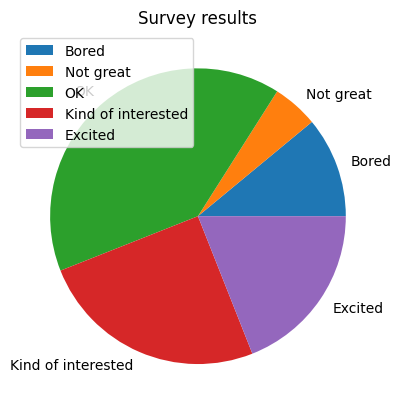

In [24]:
#pie graph example in Storytelling with Data 
import matplotlib.pyplot as plt
results = ['Bored', 'Not great', 'OK', 'Kind of interested', 'Excited']
percent = [11, 5, 40, 25, 19]

plt.pie(percent, labels=results)
plt.legend()
plt.title('Survey results')
plt.show()